In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a360-internship-practice/User.csv
/kaggle/input/a360-internship-practice/Location.csv
/kaggle/input/a360-internship-practice/Reactions.csv
/kaggle/input/a360-internship-practice/ReactionTypes.csv
/kaggle/input/a360-internship-practice/Profile.csv
/kaggle/input/a360-internship-practice/Session.csv
/kaggle/input/a360-internship-practice/Content.csv


# <h1 align="center">Social buzz content Analysis (Accententure Internship)</h1>

<div style="text-align:center">
    <img src="https://i1.wp.com/opportunitycell.com/wp-content/uploads/2023/06/accenture.jpeg?resize=950%2C500&ssl=1" alt="Image" />
</div>

# Data Understanding / Data Modeling

In [106]:
content=pd.read_csv("/kaggle/input/a360-internship-practice/Content.csv")
Reactions=pd.read_csv("/kaggle/input/a360-internship-practice/Reactions.csv")
ReactionType=pd.read_csv("/kaggle/input/a360-internship-practice/ReactionTypes.csv")

In [107]:
content.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [108]:
content.head(10)

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...
5,5,cf1e8c1a-23eb-4426-9f58-002fb1b53e91,4607d7b0-3313-49b8-9f73-5b8227fc5b67,GIF,cooking,NaN
6,6,3f8590c7-6ab2-4973-805a-90cdec355f05,ae600af5-c1f0-4b1f-adb0-1b4c246373e4,video,dogs,https://socialbuzz.cdn.com/content/storage/3f8...
7,7,e5490118-90d5-4572-ab1c-1fbc87b8d9ca,583f2bde-886d-4cf3-a5c4-7cb60cd25df3,video,technology,https://socialbuzz.cdn.com/content/storage/e54...
8,8,0bedca96-fb76-4287-a83c-17330ed39cce,2bd9c167-e06c-47c1-a978-3403d6724606,photo,soccer,https://socialbuzz.cdn.com/content/storage/0be...
9,9,b18cb63f-4c8e-44ee-a47f-541e95191d11,13f0db8a-152a-496f-a6e8-1ed6a90b8788,photo,public speaking,https://socialbuzz.cdn.com/content/storage/b18...


In [109]:
Reactions.head(10)

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,7918d465-0953-4f20-9e28-539e74c82e2f,peeking,2020-12-07 06:27:54
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,fa3e42f0-71d8-455f-b024-e52d5c27a145,cherish,2021-04-11 17:35:49
8,8,97522e57-d9ab-4bd6-97bf-c24d952602d2,b0c22f82-b882-4394-bf27-6dfadf26e5c2,hate,2021-01-27 08:32:09
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,1932a904-86ba-4438-bb52-b7e6516a4019,peeking,2021-04-01 22:54:23


In [110]:
ReactionType.head(10)

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


# Data Preprocessing/ Data cleaning

In [111]:
# Dropping 'User ID' and 'URL' columns
content = content.drop(['Unnamed: 0','User ID', 'URL'], axis=1)

In [112]:
content.sample(10)

,Content ID,Type,Category
549,bc604b62-adbc-4c93-a2ae-602160714d1c,photo,cooking
792,15e13281-8bd0-4f40-a0fa-44749cf32378,video,dogs
260,c7b02507-18a2-4169-91f1-4fc727c8bc03,GIF,dogs
903,8d7a1aff-abed-432f-a458-a4ab40324e72,GIF,travel
907,52be2c2f-be1f-4cda-a2d6-5c147c018115,audio,food
134,2cbbdbf6-b34e-4fbb-bdc6-904e61f91ce7,photo,animals
208,db3e5630-f959-4ce1-a12b-02efa655780e,video,animals
484,2e84726a-e69f-44e8-ac0f-c4a31516e342,video,dogs
602,2f246c65-25f0-4144-b3f1-a180865b1766,video,technology
829,c75dfa33-cd71-486f-b4e1-f5e9133ae873,photo,veganism


In [113]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [114]:
content['Category'] = content['Category'].str.replace('"', '')

In [115]:
# Renaming 'Type' column to 'content Type'
content = content.rename(columns={'Type': 'content Type'})

In [116]:
content.head()

,Content ID,content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [117]:
Reactions.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [118]:
# Dropping 'User ID' columns
Reactions = Reactions.drop(['Unnamed: 0','User ID'], axis=1)

In [119]:
Reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   Type        24573 non-null  object
 2   Datetime    25553 non-null  object
dtypes: object(3)
memory usage: 599.0+ KB


In [120]:
# Checking for null values
null_counts = Reactions.isnull().sum()
print("Null value counts:\n", null_counts)

# Dropping rows with null values
Reactions = Reactions.dropna()

Null value counts:
 Content ID      0
Type          980
Datetime        0
dtype: int64


In [121]:
Reactions.isnull().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [122]:
Reactions.head()

,Content ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [123]:
# Renaming 'Type' column to 'Reaction Type'
Reactions = Reactions.rename(columns={'Type': 'Reaction Type'})

In [124]:
Reactions.head()

,Content ID,Reaction Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58


In [125]:
# Convert 'Datetime' column to datetime datatype
Reactions['Datetime'] = pd.to_datetime(Reactions['Datetime'])

In [126]:
Reactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [127]:
ReactionType.head()

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30


In [128]:
# Renaming 'Type' column to 'Reaction Type'
ReactionType = ReactionType.rename(columns={'Type': 'Reaction Type'})

In [129]:
ReactionType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     16 non-null     int64 
 1   Reaction Type  16 non-null     object
 2   Sentiment      16 non-null     object
 3   Score          16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [130]:
# Dropping 'Unnamed: 0' columns
ReactionType = ReactionType.drop(['Unnamed: 0'], axis=1)

In [131]:
ReactionType

,Reaction Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


# Tasks:
# 1. Create a final data set by merging your three tables together

In [132]:
content.columns

Index(['Content ID', 'content Type', 'Category'], dtype='object')

In [133]:
Reactions.columns

Index(['Content ID', 'Reaction Type', 'Datetime'], dtype='object')

In [134]:
ReactionType.columns

Index(['Reaction Type', 'Sentiment', 'Score'], dtype='object')

In [135]:
# Joining the relevant columns from the 'Content' dataset
Reactions = pd.merge(Reactions, content[['Content ID', 'content Type', 'Category']], on='Content ID', how='left')

# Joining the 'Reaction Types' dataset
Reactions = pd.merge(Reactions, ReactionType, on='Reaction Type', how='left')

# Printing the updated table
Reactions.head()

,Content ID,Reaction Type,Datetime,content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [136]:
# Assuming you have joined the relevant columns from 'Content' and 'Reaction Types' datasets into 'Reactions'
df = Reactions  # Assigning the joined DataFrame to 'df'

# Saving the DataFrame to a file (e.g., CSV)
df.to_csv('final_dataframe.csv', index=False)

# 2. Figure out the Top 5 performing categories

In [137]:
# Grouping by 'Category' and calculating the sum of 'Score' for each category
category_scores = df.groupby('Category')['Score'].sum()

# Sorting the category scores in descending order
sorted_categories = category_scores.sort_values(ascending=False)

# Selecting the top 5 performing categories
top_categories = sorted_categories.head(5)

# Printing the top 5 performing categories
print("Top 5 Performing Categories:")
print(top_categories)

Top 5 Performing Categories:
Category
animals           71242
healthy eating    69067
technology        68521
science           66549
culture           64952
Name: Score, dtype: int64


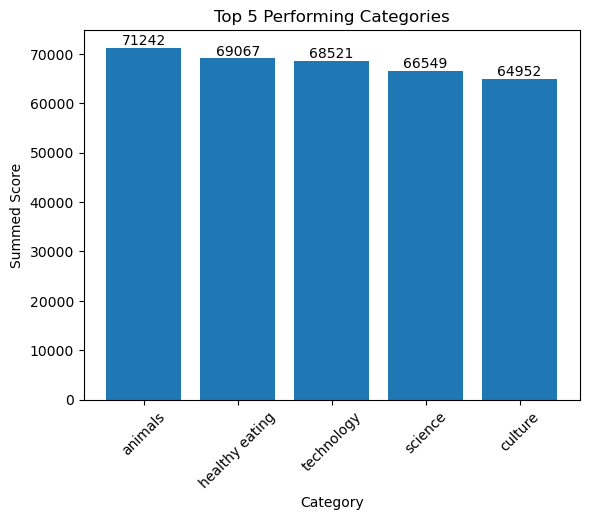

In [138]:
import matplotlib.pyplot as plt

# Plotting a bar graph of the top performing categories
plt.bar(top_categories.index, top_categories.values)

# Adding labels and title to the graph
plt.xlabel('Category')
plt.ylabel('Summed Score')
plt.title('Top 5 Performing Categories')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Adding value labels to the bars
for i, v in enumerate(top_categories.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Displaying the graph
plt.show()

# Created a final dataset by merging the Reaction, Content, and Reaction Types tables together in Python.
- Used the Reaction table as the base table and joined relevant columns from the Content dataset and Reaction Types dataset using pandas merge operation.
- Calculated the total scores for each category by grouping the dataset by category and summing the scores.
- Identified the top 5 performing categories based on the summed scores using pandas' nlargest function.
- Produced a comprehensive spreadsheet that includes the cleaned dataset and the top 5 categories in Python.
- Completed the data preprocessing work, ensuring improved data quality and readiness for visualization.
- The finalized dataset provides valuable insights for further analysis and exploration in Python.
- The data modeling exercise enhances our understanding of trends and patterns in the dataset using Python.
- The resultant dataset is now prepared for visualization and in-depth analysis using Python.

# Data Visualization

# <h1 align="center">Descriptive Analysis</h1>

In [139]:
df.describe(include='all')

/tmp/ipykernel_33/2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Content ID,Reaction Type,Datetime,content Type,Category,Sentiment,Score
count,24573,24573,24573,24573,24573,24573,24573.000000
unique,962,16,24562,4,29,3,NaN
top,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,2020-11-01 00:05:07,photo,animals,positive,NaN
freq,48,1622,2,6589,1805,13807,NaN
first,NaN,NaN,2020-06-18 08:07:22,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-06-18 08:30:29,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,39.622553
std,NaN,NaN,NaN,NaN,NaN,NaN,26.043011
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,15.000000


In [140]:
df.describe(datetime_is_numeric=True)

,Datetime,Score
count,24573,24573.000000
mean,2020-12-17 06:35:24.454278912,39.622553
min,2020-06-18 08:07:22,0.000000
25%,2020-09-16 18:51:38,15.000000
50%,2020-12-17 06:08:30,35.000000
75%,2021-03-17 12:05:06,65.000000
max,2021-06-18 08:30:29,75.000000
std,NaN,26.043011


# Insights of Descriptive Analysis
- The dataset consists of 24,573 unique values. The data spans from June 18, 2020, to June 18, 2021.
- The maximum score observed is 75, with an average score of 39.622.
- There are four unique content types: photo, video, audio, and Gif.
- The category column has 29 unique categories, while the reaction type column has 3 unique types.
- The dataset comprises 24,573 rows and 7 columns.

# <h1 align='center'>Content Analysis: </h1>

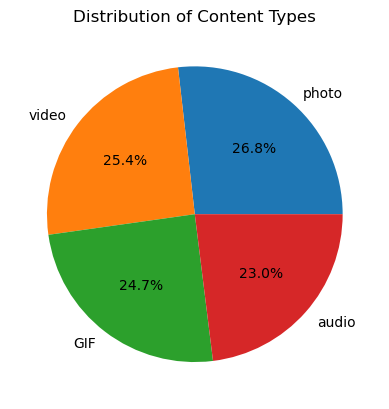

In [141]:
import matplotlib.pyplot as plt

content_type_counts = df['content Type'].value_counts()
plt.pie(content_type_counts.values, labels=content_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Content Types')
plt.show()

# Insights of Content Analysis
- The highest percentage of content is related to photos, accounting for 26.8% of the total.
- The lowest percentage of content is related to audio, accounting for 23.0% of the total.
- The content types, listed in ascending order based on their prevalence, are audio, Gif, video, and photo.

# <h1 align='center'>Reaction Type Analysis: </h1>

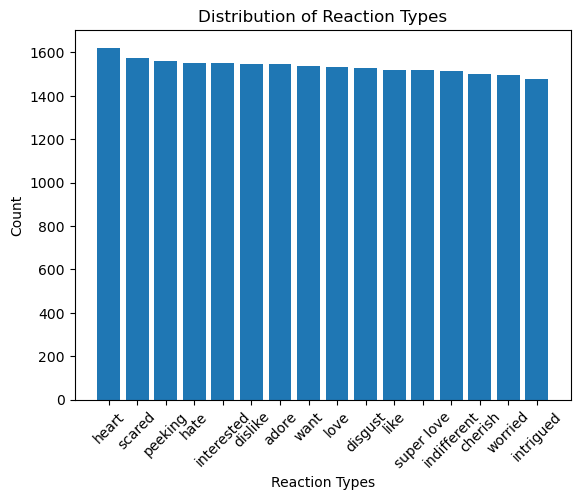

In [142]:
import matplotlib.pyplot as plt

reaction_counts = df['Reaction Type'].value_counts()
plt.bar(reaction_counts.index, reaction_counts.values)
plt.xlabel('Reaction Types')
plt.ylabel('Count')
plt.title('Distribution of Reaction Types')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()



# Insights Reaction Type
- The most commonly used reaction by people is the "Heart" reaction.
- The top three reactions based on frequency are "Heart," "Scared," and "Peeking."
- The least three reactions based on frequency are "Cherish," "Worried," and "Intrigued."

# <h1 align="center">Temporal Analysis:(Weekly and Monthly bases)</h1>

In [143]:
# Set the Datetime column as the index of the dataframe using set_index() function.
df.set_index('Datetime', inplace=True)

In [144]:
# Use the resample() method to aggregate the data based on different time intervals such as weekly.
weekly_data = df.resample('W').count()

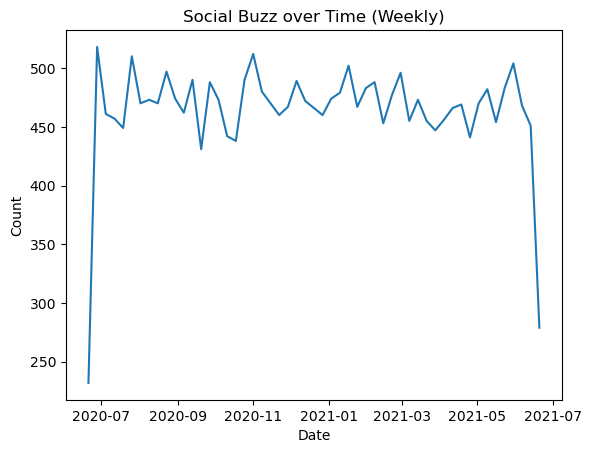

In [145]:
import matplotlib.pyplot as plt

# Assuming you have resampled weekly data stored in 'weekly_data' dataframe
plt.plot(weekly_data.index, weekly_data['Content ID'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Social Buzz over Time (Weekly)')
plt.show()


In [146]:
df.columns

Index(['Content ID', 'Reaction Type', 'content Type', 'Category', 'Sentiment',
       'Score'],
      dtype='object')

In [147]:
monthly_data = df.resample('M').count()

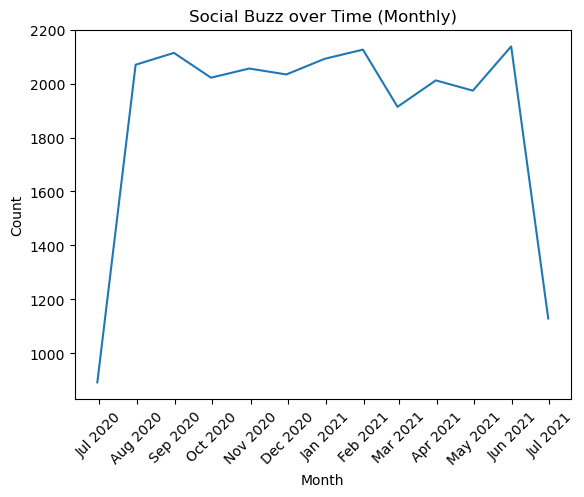

In [148]:
import matplotlib.dates as mdates

# Assuming you have resampled monthly data stored in 'monthly_data' dataframe
plt.plot(monthly_data.index, monthly_data['Content ID'])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Social Buzz over Time (Monthly)')

# Format x-axis ticks to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# Insights of Temporal Analysis:(Weekly and Monthly bases)
- The highest count of social buzz occurred in the month of June 2021.
- The lowest count of social buzz occurred in the month of March 2021.
- On a monthly basis, the count of social buzz ranged between 1600 to 2000.
- On a weekly basis, the count of social buzz varied between 430 to 500.

# <h1 align="center">Sentiment Analysis:</h1>

In [149]:
df.columns

Index(['Content ID', 'Reaction Type', 'content Type', 'Category', 'Sentiment',
       'Score'],
      dtype='object')

In [150]:
avg_sentiment_by_category = df.groupby('Category')['Score'].mean()
avg_sentiment_by_category

Category
Animals            40.467391
Culture            39.682927
Education          38.750000
Fitness            39.768116
Food               38.505495
Healthy Eating     45.333333
Public Speaking    41.750000
Science            39.818966
Soccer             40.476923
Studying           29.800000
Technology         72.333333
Travel             37.655172
Veganism           58.545455
animals            39.469252
cooking            38.915865
culture            39.725994
dogs               39.245889
education          40.115247
fitness            39.645982
food               39.286070
healthy eating     40.366452
public speaking    40.445570
science            39.612500
soccer             39.620690
studying           40.157815
technology         40.425369
tennis             37.905873
travel             39.423980
veganism           39.591754
Name: Score, dtype: float64

In [151]:
avg_sentiment_by_content_type = df.groupby('content Type')['Score'].mean()
avg_sentiment_by_content_type

content Type
GIF      39.186873
audio    39.951767
photo    39.890423
video    39.465653
Name: Score, dtype: float64

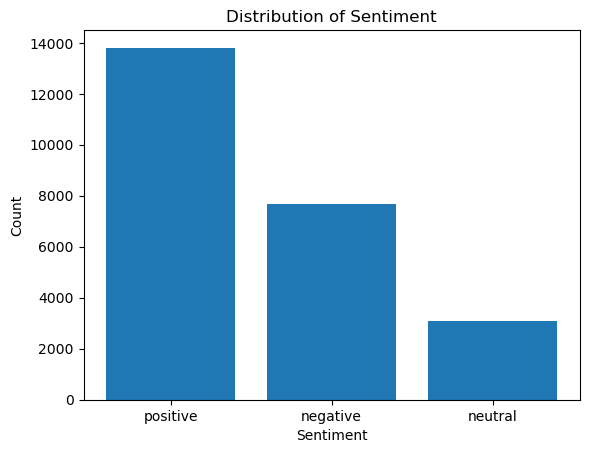

In [159]:
# Analyzing Sentiment:
sentiment_counts = df['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment')
plt.show()

# Insights of Sentimental Analysis:
- The category "Animals" has the highest mean score, indicating a positive sentiment, while "Veganism" has the lowest mean score, indicating a relatively lower sentiment.
- The top three categories with the highest mean scores are "Animals," "Culture," and "Education."
- The three categories with the lowest mean scores are "Tennis," "Travel," and "Veganism."
- Overall, the sentiment tends to be positive in different categories.
- Among different content types, GIF has the lowest mean score, while audio, photo, and video have slightly higher mean scores.

# Conclusion
- The dataset was prepared by merging relevant columns from the Reaction, Content, and Reaction Types datasets using pandas merge operation.

- The top 5 performing categories based on the summed scores were identified using pandas' nlargest function.

- The dataset contains a comprehensive collection of social media data with 24,573 unique values spanning from June 18, 2020, to June 18, 2021. This dataset provides a valuable resource for understanding trends and patterns in social media engagement.

- The content analysis reveals that photos are the most prevalent type of content, accounting for 26.8% of the total, while audio content is relatively less common, representing 23.0% of the total. The content types in ascending order of prevalence are audio, Gif, video, and photo.

- In terms of reaction types, the "Heart" reaction is the most commonly used by people, followed by "Scared" and "Peeking." On the other hand, reactions such as "Cherish," "Worried," and "Intrigued" are less frequently used.

- The temporal analysis shows that the highest count of social buzz occurred in June 2021, while the lowest count was observed in March 2021. Monthly counts ranged between 1600 and 2000, indicating a relatively consistent level of social media activity. Weekly counts varied between 430 and 500, suggesting regular engagement throughout the analyzed period.

- The sentimental analysis reveals interesting findings regarding sentiment scores across different categories. The category "Animals" has the highest mean score, indicating a positive sentiment, while "Veganism" has the lowest mean score. The top three categories with the highest mean scores are "Animals," "Culture," and "Education," while the lowest mean scores are observed in "Tennis," "Travel," and "Veganism."

- Overall, the dataset provides valuable insights into social media engagement, content types, reaction types, and sentiment. This information can be utilized to gain a deeper understanding of user preferences, popular topics, and trends within different categories. It also highlights the importance of visuals such as photos and videos in driving social media engagement.







# Message to Client
we recommend that the client focus on leveraging visually appealing content, particularly photos, to engage their target audience. Additionally, they can explore topics related to animals, culture, and education, which have shown positive sentiment and high mean scores. By understanding the dynamics of social media engagement and sentiment, the client can optimize their content strategy and tailor it to resonate with their audience's preferences.

<div style="text-align:center">
    <img src="https://t4.ftcdn.net/jpg/05/05/39/07/360_F_505390776_8ilykzGiVSpIjUqdEXFhDY1ACRJZPDRD.jpg" alt="Image" />
</div>